In [1]:
data = read.csv('housing.data.txt',sep = '',header = FALSE)

In [2]:
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [144]:
add_next<-function(used, X, f, best='None') {
    all = colnames(X)
    best_name = ''
    update = FALSE
    Y = data$V14
    for(name in setdiff(all, used)) {
        used_new = c(used,name)
        new_X = as.matrix(data[,used_new])
        fit<-lm(Y ~ new_X)
        pred<-as.numeric(predict(fit,data[14]))
        cur<-f(new_X, Y, pred)
        if(best == 'None' || cur < best) {
            best = cur
            best_name = name
            update = TRUE
        }
    }
      
    if(update) {
        print('update:')
        print(best_name)
        return(c(best_name, best, used))
    }
    
    print('No Update')
    return(c())
}

aic<-function(X,real, pred) {
    k = ncol(X)
    n = nrow(X)
    rss = dist(rbind(pred,real))^2
    return(2 * k/n + (log(rss / n) + 1))
}

bic<-function(X, real, pred) {
    k = ncol(X)
    n = nrow(X)
    rss = dist(rbind(pred,real))^2
    return (2 * k * log(n) / n + (log(rss/n) + 1))
}

In [145]:
calc_model<-function(f) {
    used = c()
    History = c()
    best = 'None'
    while(TRUE) {
        cache = add_next(used,data[-c(14)],f,best)
        if (length(cache) == 0) {
            break
        } else {
            History = c(History, cache[2])
            used = c(used, cache[1])
            best = cache[2]
        }
    }
    return (c(History, used))
}

In [146]:
res_aic = calc_model(aic)

[1] "update:"
[1] "V13"
[1] "update:"
[1] "V6"
[1] "update:"
[1] "V11"
[1] "update:"
[1] "V8"
[1] "update:"
[1] "V5"
[1] "update:"
[1] "V4"
[1] "update:"
[1] "V12"
[1] "update:"
[1] "V2"
[1] "update:"
[1] "V1"
[1] "update:"
[1] "V9"
[1] "update:"
[1] "V10"
[1] "No Update"


In [147]:
res_bic=calc_model(bic)

[1] "update:"
[1] "V13"
[1] "update:"
[1] "V6"
[1] "update:"
[1] "V11"
[1] "update:"
[1] "V8"
[1] "update:"
[1] "V5"
[1] "update:"
[1] "V4"
[1] "No Update"


In [148]:
res_aic

[1] "4.65416830295855" "4.42604055078275" "4.3125127901506"  "4.27943329893208"
 [5] "4.22425461969187" "4.2015281701897"  "4.18275214843485" "4.17057153655196"
 [9] "4.16638096160477" "4.15040100019209" "4.12996164470738" "V13"             
[13] "V6"               "V11"              "V8"               "V5"              
[17] "V4"               "V12"              "V2"               "V1"              
[21] "V9"               "V10"

In [149]:
res_bic

[1] "4.67482655066325" "4.46735704619214" "4.37448753326468" "4.36206628975085"
 [5] "4.32754585821534" "4.32547765641786" "V13"              "V6"              
 [9] "V11"              "V8"               "V5"               "V4"

In [150]:
aic_numb = res_aic[1:13]
bic_numb = res_bic[1:13]

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“в результате преобразования созданы NA”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“в результате преобразования созданы NA”

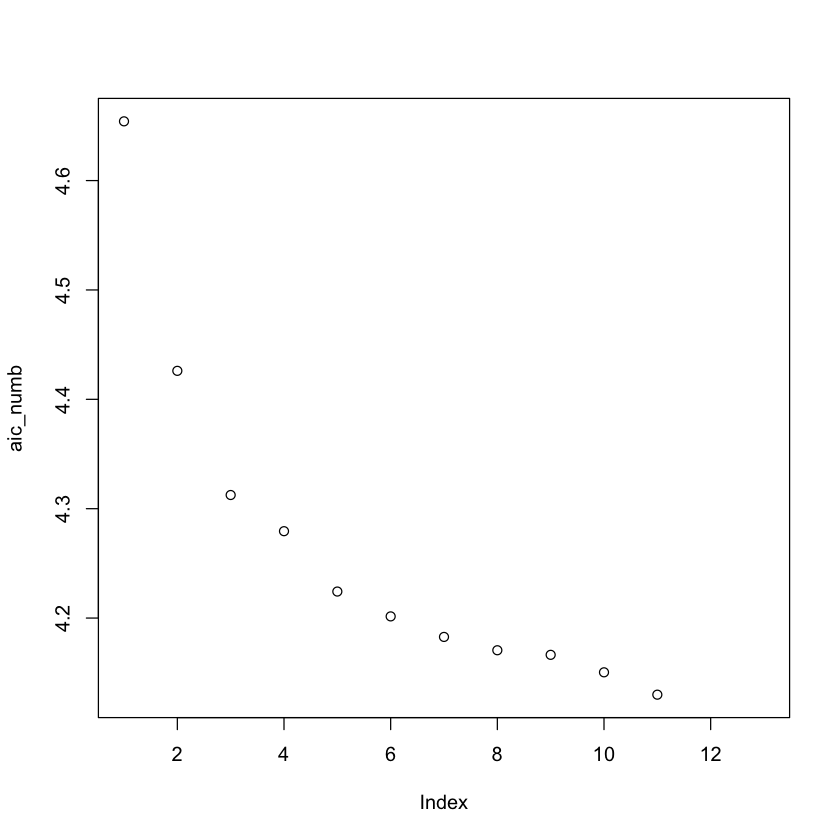

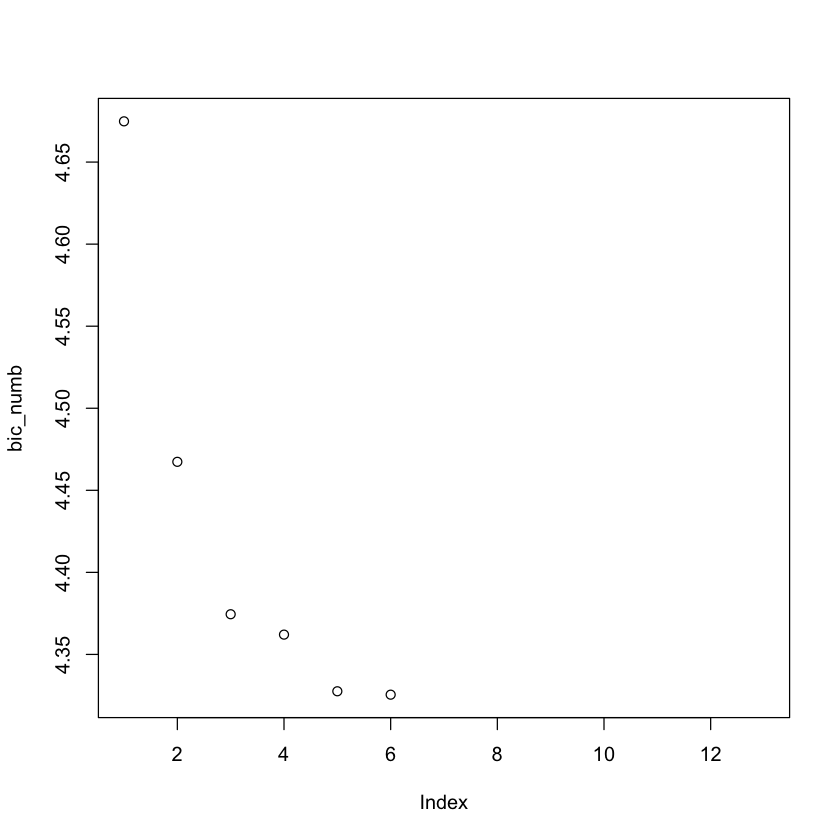

In [151]:
plot(aic_numb)
plot(bic_numb)

Видно, что сначала выбираются одни и те же признаки (это и так понятно так как критерии отличаются на константу). В какой то момент алгоритм построения по bic критерию перестает добалять признаки, так как штраф за них становится сильно больше (так как доп салагаемое  ~ ln n).

In [1]:
?p.adjust